
 Welcome to CSV Toolkit
1. Generate Sample Dataset
2. Analyze CSV File
3. Exit


Choose an option (1–3):  1



 Choose Dataset Type to Generate
a. Student
b. Employee
c. Sales


Select type (a/b/c):  a



 Student data saved to students.csv

 Welcome to CSV Toolkit
1. Generate Sample Dataset
2. Analyze CSV File
3. Exit


Choose an option (1–3):  2



 Available CSV files:
1. cleaned_cleaned_employees.csv
2. cleaned_employees.csv
3. cleaned_students.csv
4. employees.csv
5. students.csv



 Enter file number to analyze:  5



 Analyzing: students.csv
🔹 Shape: (100, 6)
🔹 Columns: ['StudentID', 'Name', 'Math', 'Science', 'English', 'Attendance (%)']
🔹 Data Types:
 StudentID          object
Name               object
Math                int64
Science             int64
English             int64
Attendance (%)    float64
dtype: object

 Missing Values:
 StudentID         0
Name              0
Math              0
Science           0
English           0
Attendance (%)    0
dtype: int64

 Descriptive Stats:
        StudentID              Name        Math     Science     English  \
count        100               100  100.000000  100.000000  100.000000   
unique       100               100         NaN         NaN         NaN   
top        S1000  Tracey Hernandez         NaN         NaN         NaN   
freq           1                 1         NaN         NaN         NaN   
mean         NaN               NaN   67.330000   67.270000   69.590000   
std          NaN               NaN   16.508373   19.056988   18.312161  

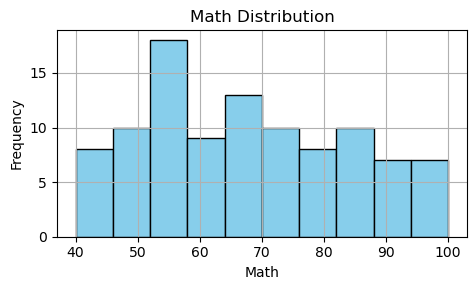

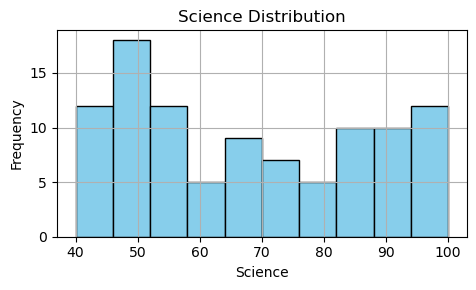

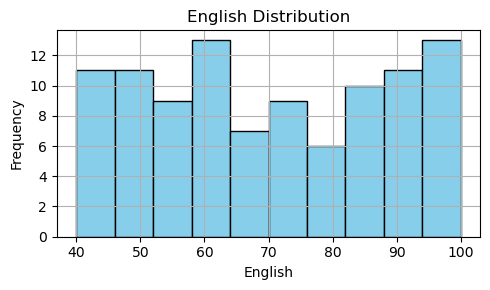

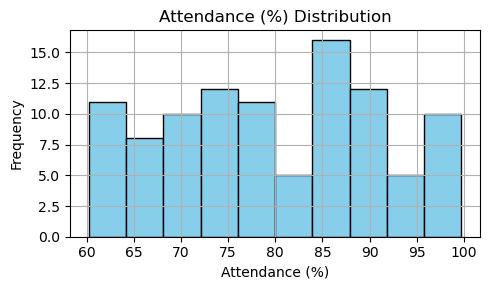


 Welcome to CSV Toolkit
1. Generate Sample Dataset
2. Analyze CSV File
3. Exit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import glob
from faker import Faker

fake = Faker()

# Data Generation Functions

def generate_student_data(filename="students.csv", rows=100):
    data = {
        "StudentID": [f"S{1000 + i}" for i in range(rows)],
        "Name": [fake.name() for _ in range(rows)],
        "Math": [random.randint(40, 100) for _ in range(rows)],
        "Science": [random.randint(40, 100) for _ in range(rows)],
        "English": [random.randint(40, 100) for _ in range(rows)],
        "Attendance (%)": [round(random.uniform(60, 100), 2) for _ in range(rows)],
    }
    pd.DataFrame(data).to_csv(filename, index=False)
    print(f"\n Student data saved to {filename}")

def generate_employee_data(filename="employees.csv", rows=100):
    departments = ['HR', 'IT', 'Finance', 'Marketing']
    data = {
        "EmpID": [f"E{2000 + i}" for i in range(rows)],
        "Name": [fake.name() for _ in range(rows)],
        "Department": [random.choice(departments) for _ in range(rows)],
        "Salary": [random.randint(30000, 100000) for _ in range(rows)],
        "Joining Date": [fake.date_between(start_date='-5y', end_date='today') for _ in range(rows)],
    }
    pd.DataFrame(data).to_csv(filename, index=False)
    print(f"\n Employee data saved to {filename}")

def generate_sales_data(filename="sales.csv", rows=100):
    products = ['Laptop', 'Phone', 'Headphones', 'Monitor', 'Mouse']
    data = {
        "TransactionID": [f"T{3000 + i}" for i in range(rows)],
        "Product": [random.choice(products) for _ in range(rows)],
        "Quantity": [random.randint(1, 10) for _ in range(rows)],
        "Price": [random.randint(1000, 50000) for _ in range(rows)],
        "Date": [fake.date_between(start_date='-2y', end_date='today') for _ in range(rows)],
    }
    pd.DataFrame(data).to_csv(filename, index=False)
    print(f"\n Sales data saved to {filename}")

# CSV Analyzer Functions

def list_csv_files():
    files = glob.glob("*.csv")
    if not files:
        print("No CSV files found in the current folder.")
        return []
    
    print("\n Available CSV files:")
    for i, file in enumerate(files, start=1):
        print(f"{i}. {file}")
    return files

def analyze_csv_option():
    files = list_csv_files()
    if not files:
        return

    try:
        choice = int(input("\n Enter file number to analyze: "))
        if 1 <= choice <= len(files):
            analyze_csv(files[choice - 1])
        else:
            print(" Invalid selection.")
    except ValueError:
        print(" Please enter a valid number.")

def analyze_csv(file_path):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(" File not found.")
        return

    print(f"\n Analyzing: {file_path}")
    print("🔹 Shape:", df.shape)
    print("🔹 Columns:", list(df.columns))
    print("🔹 Data Types:\n", df.dtypes)
    print("\n Missing Values:\n", df.isnull().sum())
    print("\n Descriptive Stats:\n", df.describe(include='all'))

    # Clean & save
    df_cleaned = df.fillna(df.mean(numeric_only=True))
    cleaned_file = f"cleaned_{os.path.basename(file_path)}"
    df_cleaned.to_csv(cleaned_file, index=False)
    print(f"\n Cleaned data saved as {cleaned_file}")

    # Plot numeric columns
    for col in df_cleaned.select_dtypes(include=np.number).columns:
        plt.figure(figsize=(5, 3))
        df_cleaned[col].hist(color='skyblue', edgecolor='black')
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

    # Plot small categorical columns
    for col in df_cleaned.select_dtypes(include='object').columns:
        if df_cleaned[col].nunique() <= 10:
            plt.figure(figsize=(5, 3))
            df_cleaned[col].value_counts().plot(kind='bar', color='orange')
            plt.title(f"{col} Frequency")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()

#  Main Menu Loop

def main():
    while True:
        print("\n Welcome to CSV Toolkit")
        print("1. Generate Sample Dataset")
        print("2. Analyze CSV File")
        print("3. Exit")

        choice = input("Choose an option (1–3): ")

        if choice == '1':
            print("\n Choose Dataset Type to Generate")
            print("a. Student")
            print("b. Employee")
            print("c. Sales")
            sub = input("Select type (a/b/c): ").lower()

            if sub == 'a':
                generate_student_data()
            elif sub == 'b':
                generate_employee_data()
            elif sub == 'c':
                generate_sales_data()
            else:
                print("Invalid dataset type.")

        elif choice == '2':
            analyze_csv_option()

        elif choice == '3':
            print("Exiting CSV Toolkit. Goodbye!")
            break

        else:
            print("Invalid option. Please choose again.")

if __name__ == "__main__":
    main()
